In [24]:
import pymongo
import pandas as pd
import pickle

from textblob import TextBlob
from wordcloud import WordCloud 

In [7]:
client = pymongo.MongoClient("localhost")    #name of the docker container 
db = client.tweetsdb                         #the name of a database*(autom created)
collection = db.tweet_data                 #create a collection

In [8]:
df=pd.DataFrame.from_dict(collection.find())

In [15]:
df

,_id,text,username
0,60cfad80f03881893228de8c,Opinion: Taking on racism and crime should be ...,washingtonpost
1,60cfad80f03881893228de8d,Katie Ledecky stays focused on her own Tokyo g...,washingtonpost
2,60cfad80f03881893228de8e,Phoebe Bacon was once Katie Ledecky’s school “...,washingtonpost
3,60cfad80f03881893228de8f,"Summer solstice arrives Sunday night, marking ...",washingtonpost
4,60cfad80f03881893228de90,Some 5 million Palestinians in the West Bank a...,washingtonpost
...,...,...,...
195,60cfad86f03881893228df4f,"""He was our sweet, good boy."" \n\nChamp, Presi...",nytimes
196,60cfad86f03881893228df50,"In Opinion\n\n""Perhaps without quite knowing i...",nytimes
197,60cfad86f03881893228df51,Republican state lawmakers have introduced at ...,nytimes
198,60cfad86f03881893228df52,A harrowing video captures how even the most i...,nytimes


In [16]:
#joining tweets in one string
d={}
for i in df.username.unique():
    l=[]
    for j in df[df['username']==i]["text"]:
        j=j.split('\n')
        l.append(' '.join(j)) 
    
    d[i]=' '.join(l)

In [18]:
print(d.keys())

dict_keys(['washingtonpost', 'nytimes'])


In [19]:
#creating dataframe
data = pd.DataFrame.from_dict([d]).transpose()
data.columns = ['text']
data

,text
washingtonpost,Opinion: Taking on racism and crime should be ...
nytimes,Thinking about getting an antibody test to see...


In [20]:
#saving df
data.to_pickle('data.pkl')

In [62]:
#loading df
data=pd.read_pickle('data.pkl')

In [63]:
#applying polarity and subjectivity funtions
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['text'].apply(pol)
data['subjectivity'] = data['text'].apply(sub)
data

,text,polarity,subjectivity
washingtonpost,Opinion: Taking on racism and crime should be ...,0.092302,0.416867
nytimes,Thinking about getting an antibody test to see...,0.109693,0.449030


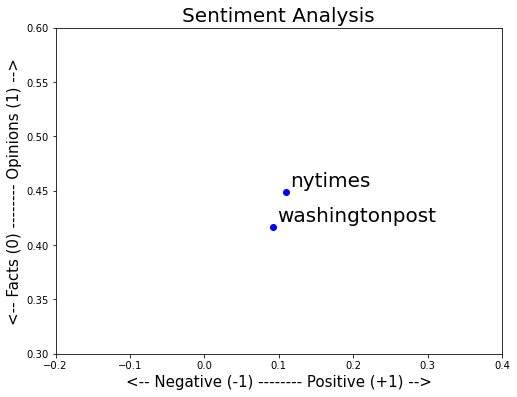

In [33]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]

for index, name in enumerate(data.index):
    x = data.polarity.loc[name]
    y = data.subjectivity.loc[name]
    plt.scatter(x, y, color='blue')
    plt.text(x+.005, y+.005,name, fontsize=20)
    plt.xlim(-0.2, 0.4) 
    plt.ylim(0.3, 0.6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative (-1) -------- Positive (+1) -->', fontsize=15)
plt.ylabel('<-- Facts (0) -------- Opinions (1) -->', fontsize=15)

plt.show()

In [42]:
#loading df
data=pd.read_pickle('data.pkl')

In [52]:
# text cleaning before wo
import re
import string

def clean_text(text):
    '''Remove @, RT, links and apostrophe'''
    text = re.sub("@[^\s]+[\s]?", '', text)   
    text = re.sub('http\S+[\s]?', '', text)
    text = re.sub('RT+[\s]?', '', text)
    text = re.sub("'s", "", text) 
    text = re.sub("’s", "", text)  
    return text
cleaner = lambda x: clean_text(x)

In [45]:
data['text'] = data['text'].apply(cleaner)

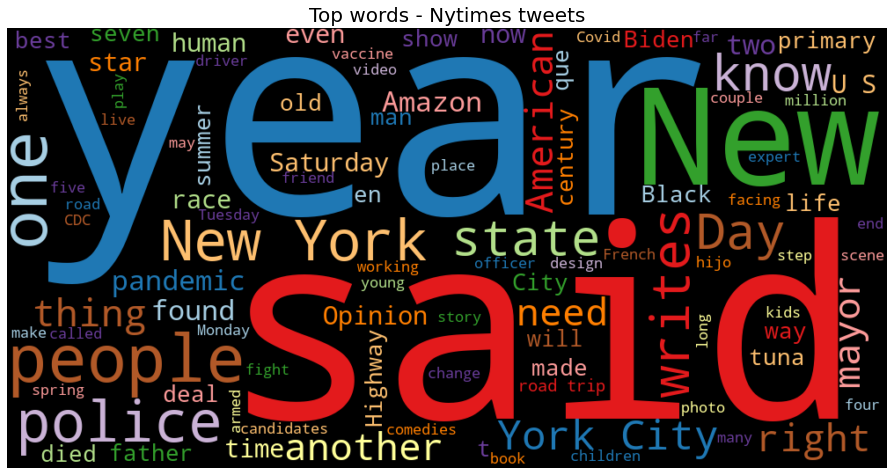

In [50]:

wordcloud = WordCloud(width=1000, height=500, random_state=1, max_words=100,colormap="Paired", background_color='black',)
wordcloud.generate(data.text.loc['nytimes'])
# declare our figure 
plt.figure(figsize=(15,10))
plt.title("Top words - Nytimes tweets", fontsize=20,color='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

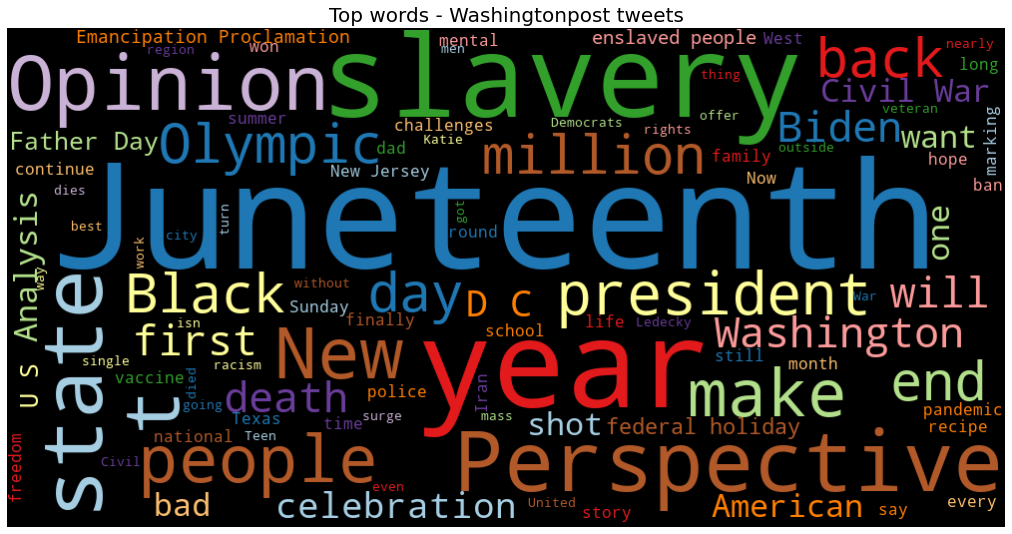

In [49]:

wordcloud = WordCloud(width=1000, height=500, random_state=1, max_words=100,colormap="Paired", background_color='black',)
wordcloud.generate(data.text.loc['washingtonpost'])
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top words - Washingtonpost tweets", fontsize=20,color='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()